In [1]:
import cv2
import os
import numpy as np
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [2]:
data_path = r"D:\\1\\train"
img_size=256             
counter=0            
X=[]
Y=[]
 
categories=os.listdir(data_path)
 
for category in categories:                                                            # this loop to know how many images in categories
    folder_path=os.path.join(data_path,category)                                       # make folder empty has the same path for dataset
    img_names=os.listdir(folder_path)                                                  # put each image in this folder
 
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        fullpath=os.path.join(data_path,category,img_name)
        try:
            img = cv2.imread(fullpath, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size,img_size))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            X.append(img)
            Y.append(category)
            counter+=1
            print("preprocessing Image Number==> ",counter)
        except:
            print("Error in ==> ",counter)
imgs=np.array(X)
lbls=np.array(Y)
del X
del Y
 


preprocessing Image Number==>  1
preprocessing Image Number==>  2
preprocessing Image Number==>  3
preprocessing Image Number==>  4
preprocessing Image Number==>  5
preprocessing Image Number==>  6
preprocessing Image Number==>  7
preprocessing Image Number==>  8
preprocessing Image Number==>  9
preprocessing Image Number==>  10
preprocessing Image Number==>  11
preprocessing Image Number==>  12
preprocessing Image Number==>  13
preprocessing Image Number==>  14
preprocessing Image Number==>  15
preprocessing Image Number==>  16
preprocessing Image Number==>  17
preprocessing Image Number==>  18
preprocessing Image Number==>  19
preprocessing Image Number==>  20
preprocessing Image Number==>  21
preprocessing Image Number==>  22
preprocessing Image Number==>  23
preprocessing Image Number==>  24
preprocessing Image Number==>  25
preprocessing Image Number==>  26
preprocessing Image Number==>  27
preprocessing Image Number==>  28
preprocessing Image Number==>  29
preprocessing Image Num

In [3]:
 
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)
 
#Train and Test Split
train_x, test_x,train_y, test_y = train_test_split(imgs,lbls_encoded,test_size=0.1)
 
#Normalization
train_x, test_x = train_x / 255.0,  test_x / 255.0
 
 

In [4]:
 
from keras.applications import VGG16
#Feature Extraction
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size,img_size, 3))
 
for layer in VGG_model.layers:
    layer.trainable = False
 
VGG_model.summary()  
feature_extractor=VGG_model.predict(train_x)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
ann_features_train = features
feature_extractor_test=VGG_model.predict(test_x)
ann_features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [16]:
import keras
#ANN
#val_loss_(dec)_val_acc_(inc)
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(7, activation="softmax")]) # change number based on output classes
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
ann=model.fit(ann_features_train, train_y, epochs=5,validation_data=(ann_features_test, test_y))
y_preds = model.predict(ann_features_test).argmax(axis=1)
Accuracy = accuracy_score(test_y,y_preds)
print("Accuracy :", Accuracy)

Epoch 1/5
195/195 [==============================] - 9s 43ms/step - loss: 0.4487 - accuracy: 0.8607 - val_loss: 0.4782 - val_accuracy: 0.8726
Epoch 2/5
195/195 [==============================] - 8s 40ms/step - loss: 0.1224 - accuracy: 0.9554 - val_loss: 0.2407 - val_accuracy: 0.9161
Epoch 3/5
195/195 [==============================] - 8s 40ms/step - loss: 0.0605 - accuracy: 0.9773 - val_loss: 0.1695 - val_accuracy: 0.9392
Epoch 4/5
195/195 [==============================] - 9s 47ms/step - loss: 0.0232 - accuracy: 0.9910 - val_loss: 0.1447 - val_accuracy: 0.9522
Epoch 5/5
22/22 [==============================] - 0s 6ms/step
Accuracy : 0.9522431259044862


In [17]:
test_y_Normal = le.inverse_transform(test_y)


In [22]:
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile

from PIL import Image, ImageTk
     
root = tk.Tk()
root.geometry("1250x950")  # Size of the window 
root.resizable(width=True, height=True)
root.title('A I project')




root['background']='#263d23' 
my_font1=('Helvetica', 25, 'bold')
my_font2=('Verdana', 15, 'bold')
label = tk.Label(root,text='Upload Files & Detect',width=30,font=my_font1)
label.grid(row=1,column=1)
label.place(anchor = CENTER, relx = .5, rely = .025)
 
 
root2 = tk.Button(root, text='Press me To Upload Images', 
   width=25,command = lambda:upload_file())
root2.grid(row=2,column=1,pady=5)
root2.place(anchor = CENTER, relx = .5, rely = .070)
def upload_file():
    f_types = [('Jpg Files', '*.jpg'),
    ('PNG Files','*.png'),('Jpeg Files', '*.jpeg')]   # types of files to select 
    filename = tk.filedialog.askopenfilename(multiple=True,filetypes=f_types)
    col=1 # start from column 1
    row=3 # start from row 3 
    for pathgui in filename:
        img=Image.open(pathgui)# read the image file
        list_of_images = []
        preprocessed = cv2.imread(pathgui, cv2.IMREAD_COLOR)
        preprocessed = cv2.resize(preprocessed, (img_size,img_size))
        preprocessed = cv2.cvtColor(preprocessed, cv2.COLOR_RGB2BGR)
        list_of_images.append(preprocessed)
        arr = np.array(list_of_images)
        feature_extractor_input=VGG_model.predict(arr)
        features_input = feature_extractor_input.reshape(feature_extractor_input.shape[0], -1)

        prediction_input = model.predict(features_input).argmax() #edited
        prediction_input_Normal = le.inverse_transform([prediction_input]) #edited
        img=img.resize((150,150)) # new width & height
        img=ImageTk.PhotoImage(img)
        root1 =tk.Label(root)
        root1.grid(row=row,column=col,pady=100,padx=10)
        root1.image = img
        text_answer=prediction_input_Normal[0] #edited
        # text_answer=text_answer.tolist()
        xz = tk.Label(root,text=text_answer,width=10,font=my_font2)  
        xz.grid(row=row+1,column=col,pady=0,padx=10)
        root1['image']=img # garbage collection
        if(col==7): # start new line after third column
            row=row+2# start wtih next row
            col=1    # start with first column
        else:       # within the same row 
            col=col+1 # increase to next column                                                                                 
root.mainloop()  # Keep the window open# your code goes here

1/1 [==============================] - 0s 38ms/step


[[102   0   0   0   0   0   0]
 [  0  96   0   0   2   0   1]
 [  0   0  95   0   0   0   0]
 [  0   0   0 117   2   0   4]
 [  0   0   0   0  79   0  22]
 [  0   0   0   0   0  91   0]
 [  0   0   0   1   1   0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      0.97      0.98        99
           2       1.00      1.00      1.00        95
           3       0.99      0.95      0.97       123
           4       0.94      0.78      0.85       101
           5       1.00      1.00      1.00        91
           6       0.74      0.97      0.84        80

    accuracy                           0.95       691
   macro avg       0.95      0.95      0.95       691
weighted avg       0.96      0.95      0.95       691



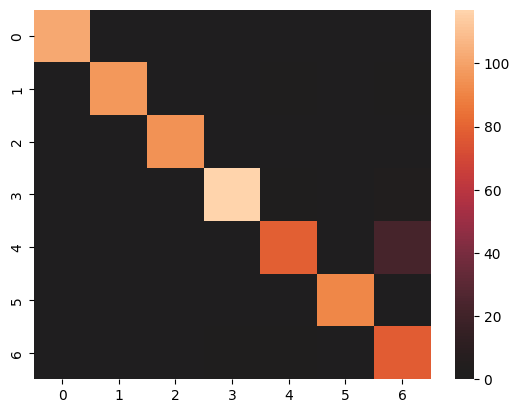

In [18]:
cm=confusion_matrix(test_y, y_preds)
print(cm)
print(classification_report(test_y, y_preds))
# drawing confusion matrix
sns.heatmap(cm, center = True)
plt.show()

AUC Value  :  0.969885433715221


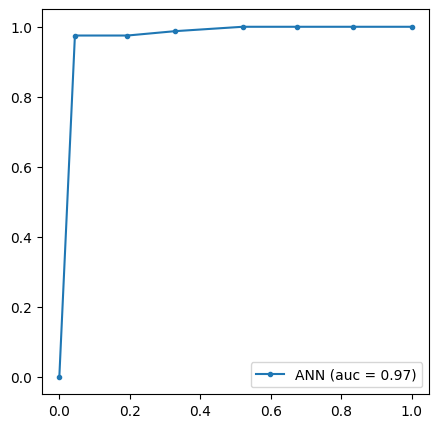

In [20]:
#Calculating ROC:  
#roc_curve(y_test, y_pred, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(test_y,y_preds,pos_label=6)
#print('fpr Value  : ', fprValue)
#print('tpr Value  : ', tprValue)
#print('thresholds Value  : ', thresholdsValue)

#Calculating Area Under the Curve AUC :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(test_y,y_preds,pos_label=6 )
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)
plt.show()

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fprValue,tprValue, marker='.', label='ANN (auc = %0.2f)' % AUCValue)
plt.legend()
plt.show()


Loss Curve : [0.4486837685108185, 0.1224052757024765, 0.060516927391290665, 0.023212002590298653, 0.01303118746727705]


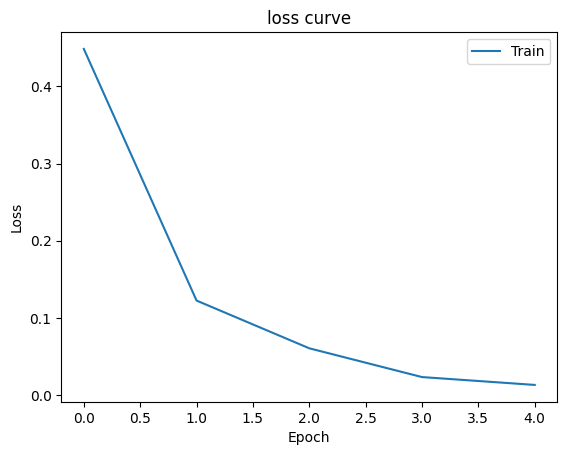

In [21]:
print("Loss Curve :",ann.history['loss'])
plt.plot(ann.history['loss'])
plt.title('loss curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()
